# Advection-diffusion-reaction model for modeling of SIMS depth profiling
## *Part 2: Addition of second component*
_Robert J. Paruch, 2016, 2020_

## Equation

$$
\frac{\partial u}{\partial t} = -a \frac{\partial u}{\partial x} +
                                \frac{\partial}{\partial x} \left(D_u(x) \frac{\partial u}{\partial x} \right) +
                                R_u(x) \\
\frac{\partial v}{\partial t} = -a \frac{\partial v}{\partial x} +
                                \frac{\partial}{\partial x} \left(D_v(x) \frac{\partial v}{\partial x} \right) +
                                R_v(x)
$$

There is a second equation for the other component, $v$. The model variables and parameters for the component $v$ are analogous to those for the component $u$, described before.

Note: The implemented now reaction coefficient (`reac_type=1`) for the component $v$ has a form of $R_v = -R_u$, where $R_u$ - reaction coefficient for the component $u$, described before.

## Examples of calculations
Illustrative examples of model calculations are shown below for given parameters.

### Variable diffusivity, reactions

In [1]:
from adrmdp.model import ADRMDP

In [2]:
m1 = ADRMDP(
    samp_len = 20,  # (nm)
    time = 4.5,  # (s)
    l_depth_u = [13.22],  # (nm)
    l_width_u = [0.9444],  # (nm)
    vel_u = 8.86222,  # (nm/s)
    diff_ampl_u = 17.9479,  # (nm^2/s)
    diff_slope_u = 0.710355,  # (1/nm)
    diff_x_infl_u = 3.49758,  # (nm)
    # vel_v = vel_u
    diff_ampl_v = 50,  # (nm^2/s)
    # diff_slope_v = diff_slope_u
    # diff_x_infl_v = diff_x_infl_u
    reac_type = 1,
    reac_const = [5],  # (1/s)
    reac_slope = 0.710355,  # (1/nm)
    reac_x_infl = 3.49758  # (nm)
)

calculating... 50% done


Of note is that the diffusivity of $v$ is set to be higher than for $u$, as shown below.

In [3]:
%matplotlib inline

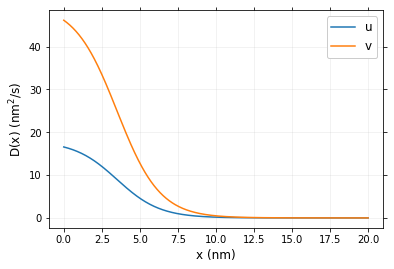

In [4]:
m1.plot_diff(comps=['u', 'v'])

The concentration surfaces for both components are shown below.

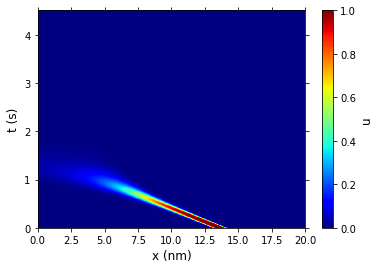

In [5]:
m1.plot_conc()

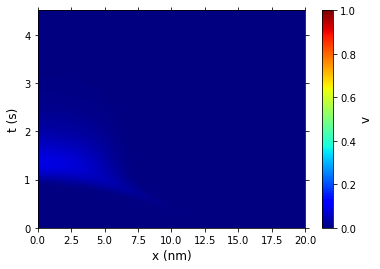

In [6]:
m1.plot_conc(comp='v')

The concentration profiles are shown below for both components, for given times.

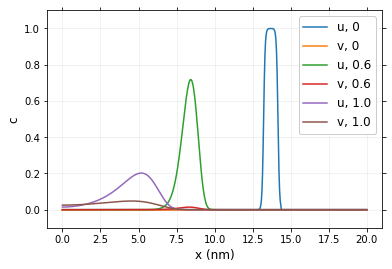

In [7]:
m1.plot_conc_sect(comps=['u', 'v'], times=[0, 0.6, 1.0])

The evolution of the profile of $c$ was described before. The intensity of this profile decreases as the component $c$ in converted into $v$ due to chemical reactions. The appearing profile of $v$ is wider due to higher diffusivity.

Finally, shown below are the depth profiles for both components, with the location of the initial layer marked out.

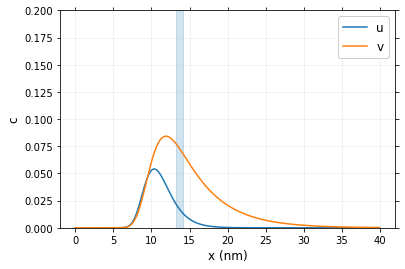

In [8]:
m1.plot_depth_prof(comps=['u', 'v'])

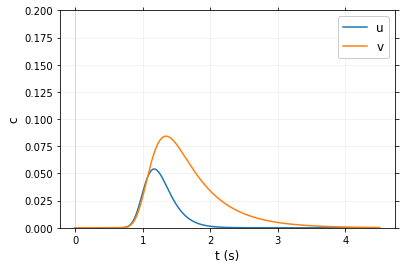

In [9]:
m1.plot_depth_prof(comps=['u', 'v'], var='time')

The resulting depth profile of $v$ is wider due to higher diffusivity of this component.